In [18]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
from scipy.interpolate import  griddata

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../nonresonant_ttbar/CMS_mtt/pp2tt_formFactors_scan.pcl')

### Plot limit on yDM

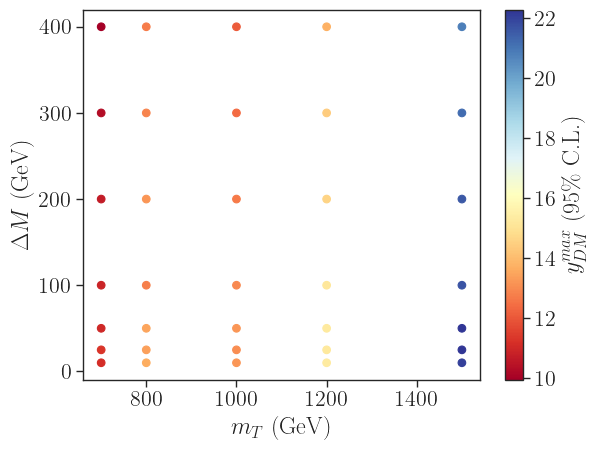

In [16]:
x = recastData['mST']
y = recastData['mChi']
dm = x-y
z = recastData['yDM (95% C.L.)']
plt.scatter(x,dm,c=z,cmap=cm,s=30)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_T$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
plt.show()

In [17]:
len(x),x.min(),x.max()

(35, 700.0, 1500.0)

In [61]:
# Interpolate to create more points
xnew = np.linspace(recastData['mST'].min(),recastData['mST'].max(),200)
ynew = np.linspace(recastData['mChi'].min(),recastData['mChi'].max(),200)
ynew = xnew-ynew
xi = np.array([list(v) for v in itertools.product(xnew,ynew)])
znew = griddata(list(zip(recastData['mST'],recastData['mST']-recastData['mChi'])),recastData['yDM (95% C.L.)'],xi=xi,
                method='linear')
znew = np.reshape(znew,(len(xnew),len(ynew)))
x,y  = np.meshgrid(xnew,ynew,indexing='ij')

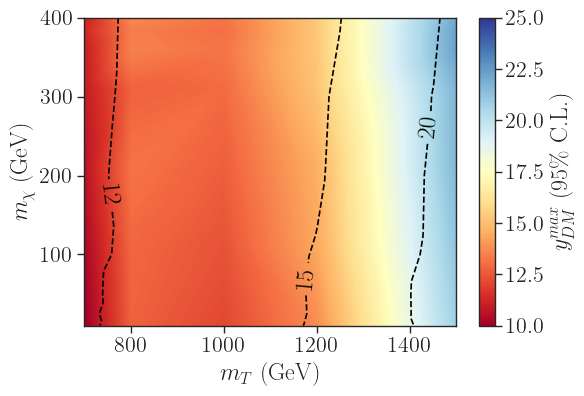

In [62]:
cValues = sorted([12.,15.,20.])
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), y.min(), y.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=10,vmax=25)
plt.colorbar(label=r'$y_{DM}^{max}$ (95\% C.L.)')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
contours = plt.contour(x, y, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
# plt.xlim(500,800)
plt.show()

### Save contour curves to text files

In [74]:
fname = 'CMS_mtt_oneLoop_contours.csv'
with open(fname,'w') as f:
   for i,item in enumerate(contours.collections):
      cV = cValues[i]
      xData = []
      yData = []
      zData = []
      for p in item.get_paths():
         v = p.vertices
         xData += list(v[:, 0])
         yData += list(v[:, 0]-v[:, 1])
         zData += list([cV]*len(v))
      if len(xData) > 0:
         np.savetxt(f,list(zip(xData,yData,zData)),fmt='%.4e',delimiter=',',header='mST_GeV,mChi_GeV,yDM',comments='\n\n# Contour for yDM=%1.0f \n' %cV)


/tmp/ipykernel_17858/2213583685.py:3: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for i,item in enumerate(contours.collections):
